# 1. Data Exploration and Visualization (20)
1. Explore Event_entry(in Files) dataset.
2. Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.
3. Include any other plots you find interesting and provide brief interpretations.

## Dealing with Missing Values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Event_df = pd.read_csv("Event_entry.csv")
Event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Sex            869 non-null    object 
 3   Age            694 non-null    float64
 4   Price          869 non-null    int64  
 5   Order          869 non-null    int64  
 6   Name           869 non-null    object 
 7   Ticket Number  869 non-null    int64  
 8   Bank Balance   869 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


In [3]:
# Show all missing values
missing_values = Event_df.isnull().sum()
missing_values

Entry              0
TicketClass        0
Sex                0
Age              175
Price              0
Order              0
Name               0
Ticket Number      0
Bank Balance       0
dtype: int64

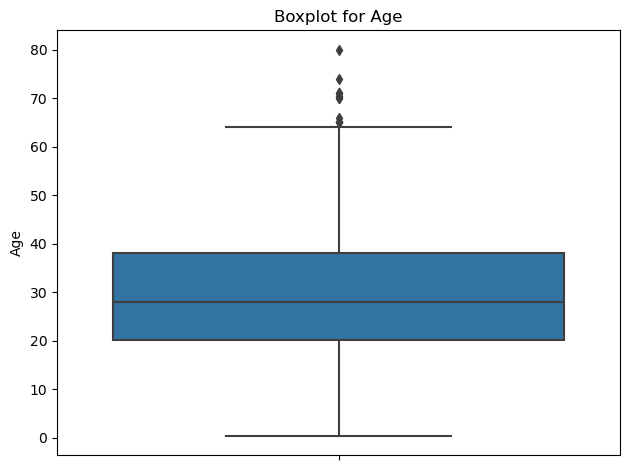

In [4]:
# Plot Age
sns.boxplot(y=Event_df["Age"])
plt.title(f'Boxplot for {"Age"}')
plt.tight_layout()
plt.show()

The "Age" variable have some outliers and skewed, I would choose to fill the missing values with median of the row as it will be less influenced by outliers and still represents the data.

In [5]:
Event_df["Age"] = Event_df["Age"].fillna(Event_df["Age"].median())

In [6]:
# Show all missing values
missing_values = Event_df.isnull().sum()
missing_values

Entry            0
TicketClass      0
Sex              0
Age              0
Price            0
Order            0
Name             0
Ticket Number    0
Bank Balance     0
dtype: int64

C:\Users\szhou\AppData\Local\Temp\ipykernel_15072\4242662636.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\szhou\AppData\Local\Temp\ipykernel_15072\4242662636.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

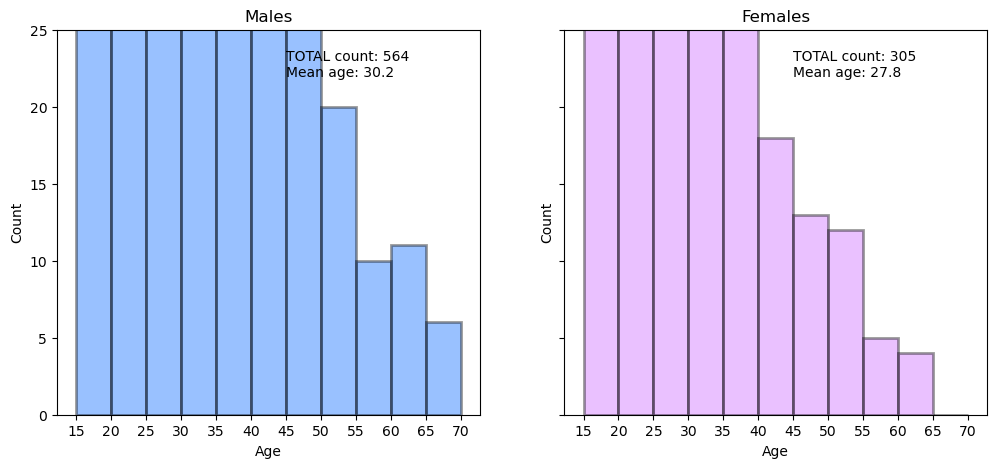

In [7]:
males_age = Event_df[Event_df['Sex']=='male']['Age'] # subset with males age
females_age = Event_df[Event_df['Sex']=='female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

Both age distribution for males and females are right-skewed, meaning that there are more younger population in the dataset, with females population being even more distributed on younger group. There are more males than females in the dataset. 

C:\Users\szhou\AppData\Local\Temp\ipykernel_15072\4218856579.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_price, bins=price_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\szhou\AppData\Local\Temp\ipykernel_15072\4218856579.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

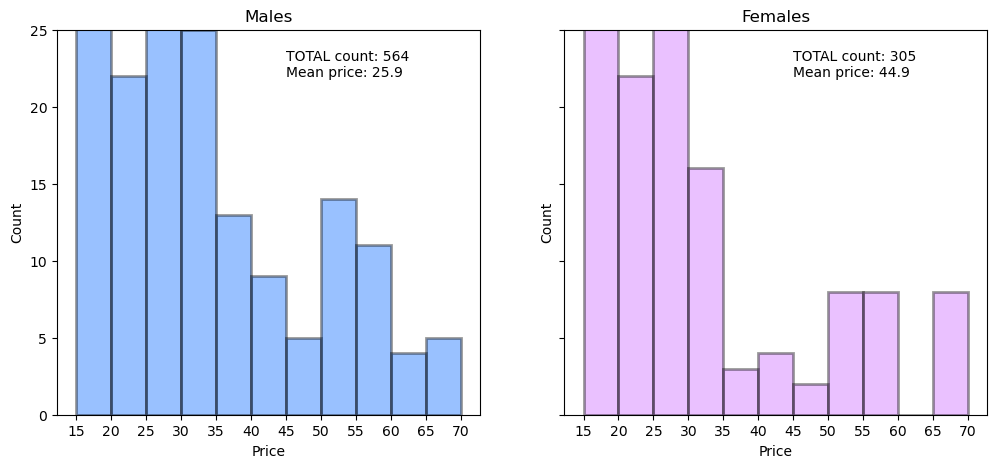

In [8]:
males_price = Event_df[Event_df['Sex']=='male']['Price'] # subset with males age
females_price = Event_df[Event_df['Sex']=='female']['Price'] # subset with females age

price_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_price, bins=price_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(price_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_price.count()))
ax1.text(45,22, "Mean price: {:.1f}".format(males_price.mean()))

# females histogram
sns.distplot(females_price, bins=price_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(price_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_price.count()))
ax2.text(45,22, "Mean price: {:.1f}".format(females_price.mean()))

plt.show()

The average price paid by femails is much higher than that paid by males. 

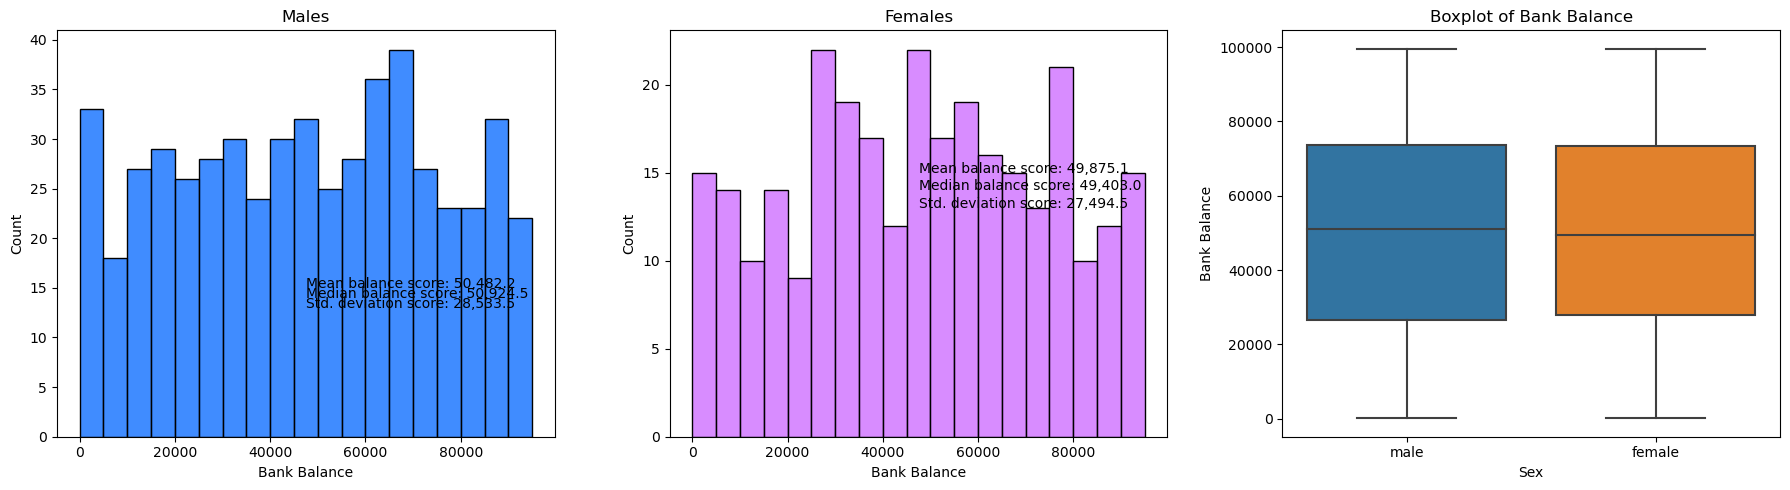

In [9]:
males_balance = Event_df[Event_df['Sex']=='male']['Bank Balance']
females_balance = Event_df[Event_df['Sex']=='female']['Bank Balance']

# Determine the appropriate bins for bank balance based on the data range
max_balance = Event_df['Bank Balance'].max()
balance_bins = range(0, int(max_balance) + 10, 5000)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

# Males histogram
sns.histplot(males_balance, bins=balance_bins, kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Males')
ax1.set_xlabel('Bank Balance')
ax1.set_ylabel('Count')
ax1.text(balance_bins[-1] * 0.5, 15, f"Mean balance score: {males_balance.mean():,.1f}")
ax1.text(balance_bins[-1] * 0.5, 14, f"Median balance score: {males_balance.median():,.1f}")
ax1.text(balance_bins[-1] * 0.5, 13, f"Std. deviation score: {males_balance.std():,.1f}")

# Females histogram
sns.histplot(females_balance, bins=balance_bins, kde=False, color='#cc66ff', ax=ax2)
ax2.set_title('Females')
ax2.set_xlabel('Bank Balance')
ax2.set_ylabel('Count')
ax2.text(balance_bins[-1] * 0.5, 15, f"Mean balance score: {females_balance.mean():,.1f}")
ax2.text(balance_bins[-1] * 0.5, 14, f"Median balance score: {females_balance.median():,.1f}")
ax2.text(balance_bins[-1] * 0.5, 13, f"Std. deviation score: {females_balance.std():,.1f}")

# Boxplot
sns.boxplot(x='Sex', y='Bank Balance', data=Event_df, ax=ax3)
ax3.set_title('Boxplot of Bank Balance')

plt.tight_layout()
plt.show()


The spread of bank balances for both females and males population is similar, with males' average and median bank balaces being relatively higher that that for females. 

## Encoding "Sex"

In [10]:
# Using one-hot encoder to encode sex
encoded_sex = pd.get_dummies(Event_df['Sex'], prefix = 'Sex').astype(int)
# Add encoded_sex to dataset
Event_df_encoded = pd.concat([Event_df, encoded_sex], axis=1)
# Drop original "Sex" column
Event_df_encoded = Event_df_encoded.drop(['Sex'], axis=1)

In [11]:
Event_df_encoded.head()

,Entry,TicketClass,Age,Price,Order,Name,Ticket Number,Bank Balance,Sex_female,Sex_male
0,0,3,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389,0,1
1,1,1,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932,1,0
2,1,3,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146,1,0
3,1,1,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627,1,0
4,0,3,35.0,8,5,"Allen, Mr. William Henry",510583,60457,0,1


In [12]:
Event_df_encoded.info() # 869 entries, 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Age            869 non-null    float64
 3   Price          869 non-null    int64  
 4   Order          869 non-null    int64  
 5   Name           869 non-null    object 
 6   Ticket Number  869 non-null    int64  
 7   Bank Balance   869 non-null    int64  
 8   Sex_female     869 non-null    int32  
 9   Sex_male       869 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(1)
memory usage: 61.2+ KB


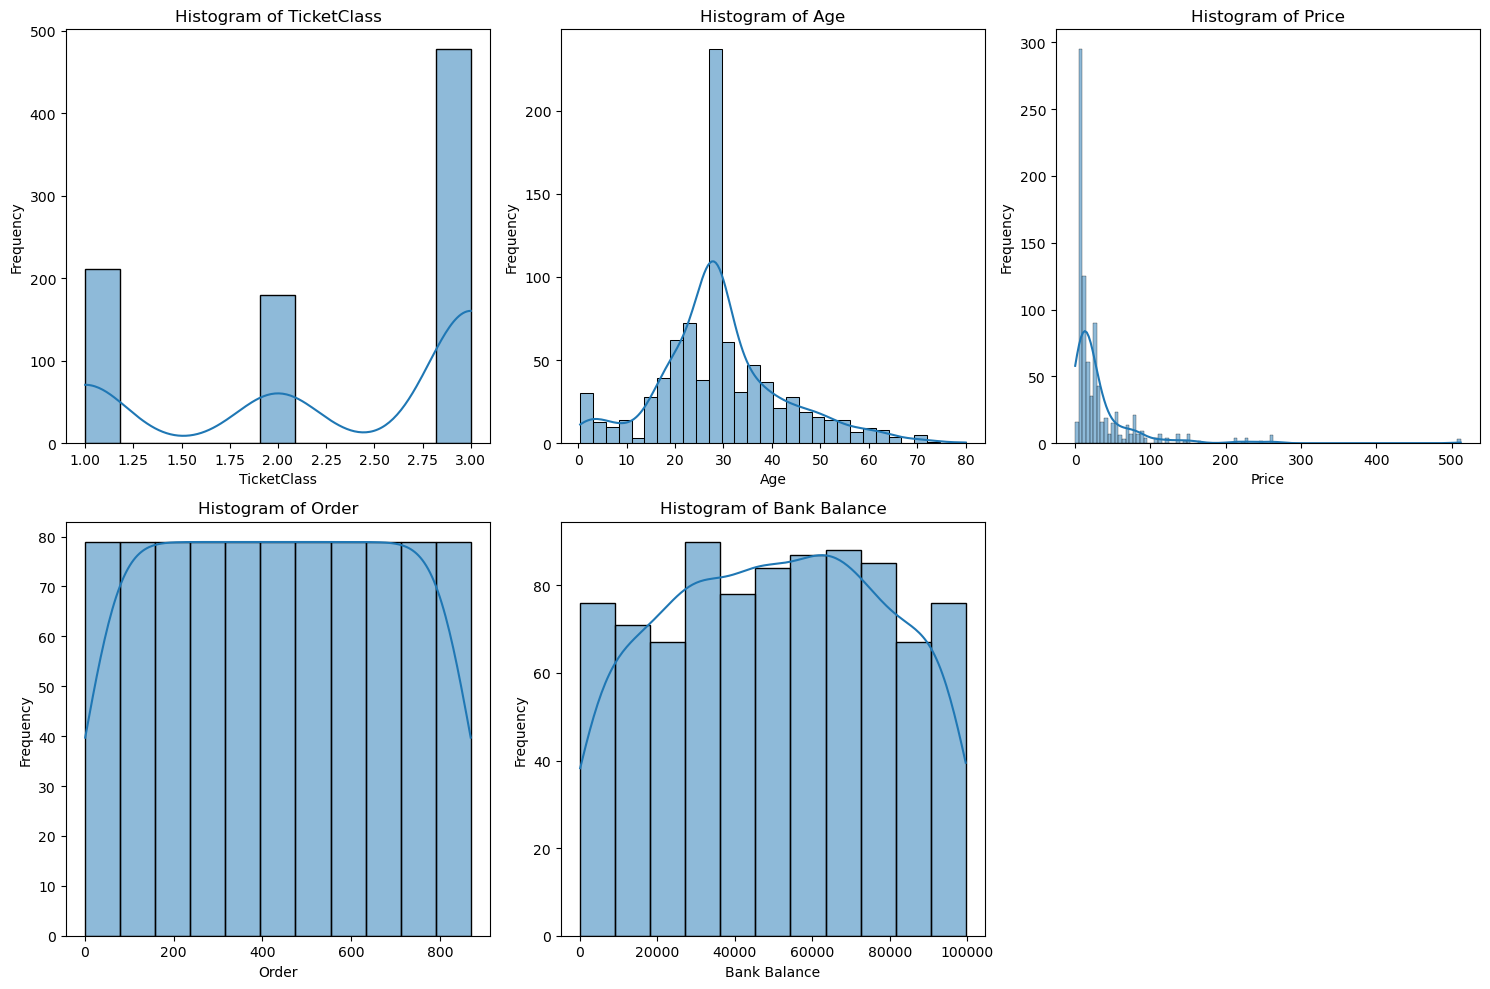

In [13]:
# Plot some columns
selected_columns = ['TicketClass', 'Age', 'Price', 'Order',
                    'Bank Balance' ]

# Plotting histograms for these columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(Event_df_encoded[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

There is a high frequency of the third ticket class, suggesting that most tickets are sold to this class. The age of the whole population is right-skewed, with a peak around 20-30 age range. Price column shows a hightly right-skewed distribution with most of the data centered close to a lower price, indicating that most purchases are at lower prices. Order column doesn't really have a meaning, its more like an identifier. Bank Balance in general is not skewed and most of the bank balance centered at 40000 - 80000. 

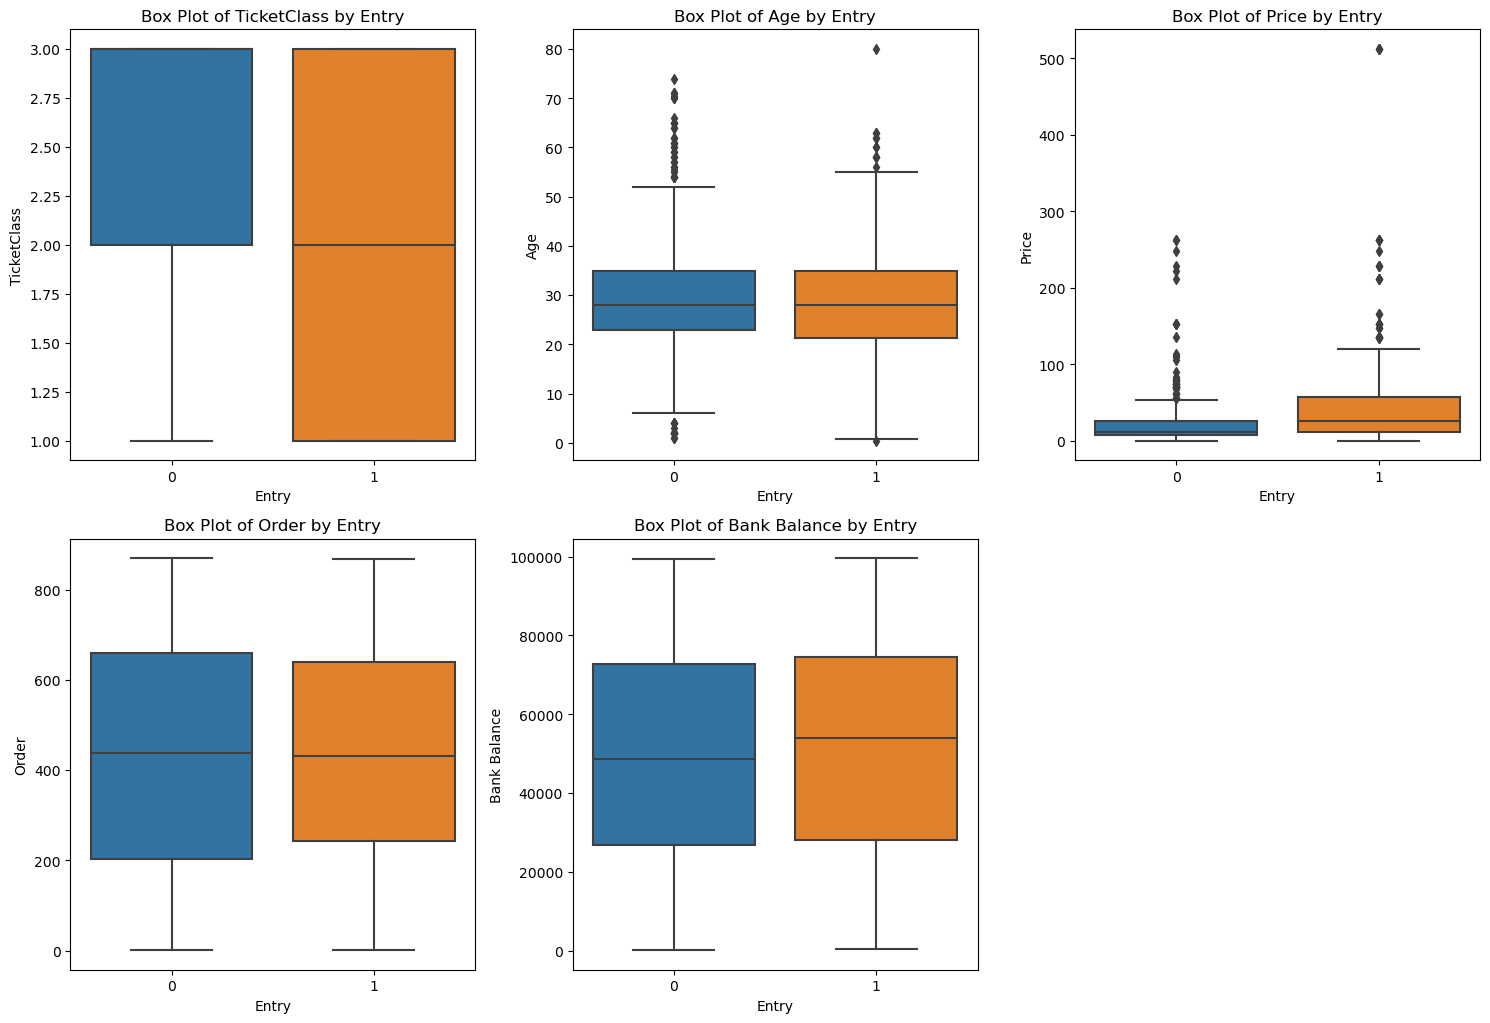

In [14]:
# Select a few columns vs Entry
selected_columns = ['TicketClass', 'Age', 'Price', 'Order',
                    'Bank Balance' ]

# Plotting box plots for each of these
plt.figure(figsize=(15, 15)) 
for i, column in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Entry', y=column, data=Event_df_encoded)  
    plt.title(f'Box Plot of {column} by Entry')

plt.tight_layout()
plt.show()


From above plots, its clear that Ticket Class and Price can make a difference of if entry is approved or not. These two variables should defintely be included for predicting model.

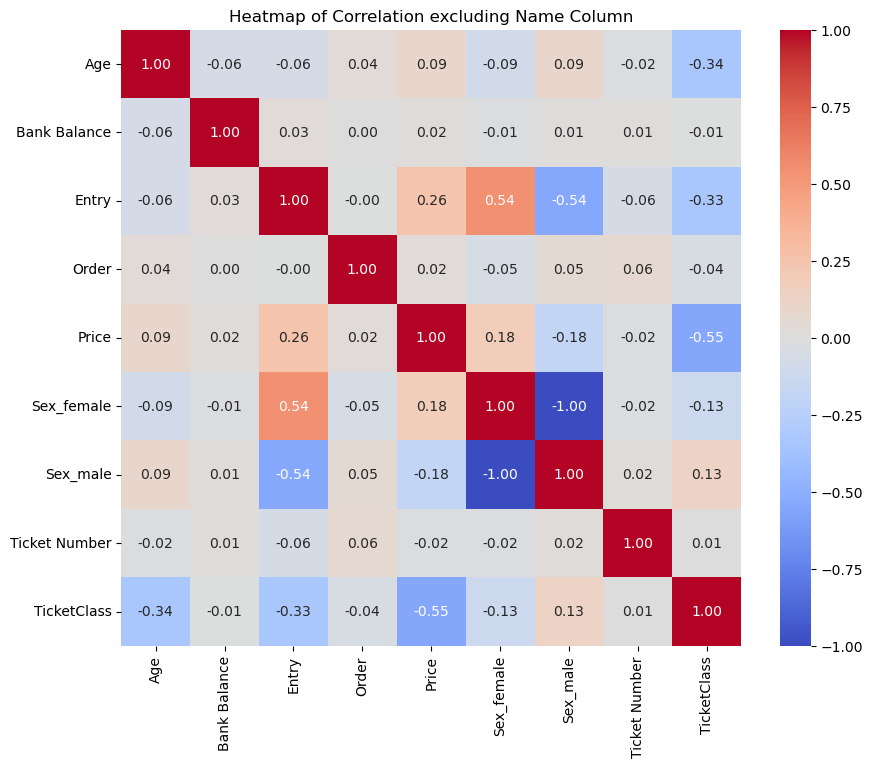

In [15]:
# Select all columns except 'Name' for the correlation matrix
corr_columns = Event_df_encoded.columns.difference(['Name'])
corr_matrix = Event_df_encoded[corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation excluding Name Column')
plt.show()

There are some variables that have relatively higher correlation. For example there is a moderate negative correlation (-0.34) between age and ticket class. And between entry and ticketc class there is also a negrative correlation (-0.33). There is a more significant negative correlation between price and ticket class(-0.55), indicating as ticket class increases, the price decreases. Also it doesn't seem like order and ticket number is correlated with any variables, and it also shouldn't matter if a buy get entry or not, I will drop these for model building

# 2. PCA Analysis (25)
1. Split the dataset into training and testing sets and encode the variables if needed.
2. Develop a Logistic regression model to predict If the entry to the event will be granted on not. (Use at least 6 dimensions)
3. Use PCA to reduce dimensions, try with 2, 4, and 6 dimensions
4. Use the above 2,4,6 dimensions to train and test the Logistic Regression Model and evaluate the impact it has on the performance.
5. Compare the OOS performance with that of a LASSO Logistic Regression Model.

(Tip: Many times, PCA reduces accuracy but the computation is much lighter and that is the tradeoff you can consider while building models in real life)

In [16]:
Event_df_encoded.info() # 869 entries, 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Age            869 non-null    float64
 3   Price          869 non-null    int64  
 4   Order          869 non-null    int64  
 5   Name           869 non-null    object 
 6   Ticket Number  869 non-null    int64  
 7   Bank Balance   869 non-null    int64  
 8   Sex_female     869 non-null    int32  
 9   Sex_male       869 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(1)
memory usage: 61.2+ KB


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Drop unnecessary column, buyer's name shouldn't have an impact on if they can entry or not
# Also dropping Order and Ticket Number as discussed earlier
Event_df_final = Event_df_encoded.drop(['Name', 'Order', 'Ticket Number'], axis=1)

In [18]:
Event_df_final.info() #7 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entry         869 non-null    int64  
 1   TicketClass   869 non-null    int64  
 2   Age           869 non-null    float64
 3   Price         869 non-null    int64  
 4   Bank Balance  869 non-null    int64  
 5   Sex_female    869 non-null    int32  
 6   Sex_male      869 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 40.9 KB


In [19]:
from sklearn.preprocessing import StandardScaler
# scikit_learn's class, Intercept is included by default
X = Event_df_final.drop(['Entry'], axis = 1)
y = Event_df_final['Entry']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression(6 dimensions)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
    
# Predict
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

X_train_with_intercept = sm.add_constant(X_train_scaled)

# Fit the GLM model for later R-squard calculation
full_model = sm.GLM(y_train, X_train_with_intercept, family=sm.families.Binomial()).fit()

# Evaluate the model
# pseudo R-squared for the training data
r_squared = 1 - (full_model.deviance / full_model.null_deviance)
mse = mean_squared_error(y_test, y_pred_proba)
rmse = sqrt(mse)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"R^2: {r_squared}")
print(f"MSE: {mse:.6f}")
print(f"rmse: {rmse:.6f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print('Classification Report:')
print(report)

R^2: 0.31737969022436285
MSE: 0.155342
rmse: 0.394134
Accuracy: 0.7759
Confusion Matrix:
[[79 14]
 [25 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        93
           1       0.80      0.69      0.74        81

    accuracy                           0.78       174
   macro avg       0.78      0.77      0.77       174
weighted avg       0.78      0.78      0.77       174



In [21]:
# Counts of entry '1' and '0'
entry_counts = Event_df_final['Entry'].value_counts()
print(entry_counts)

Entry
0    535
1    334
Name: count, dtype: int64


The R^2 for logistic regression is around 0.32, which indicates a moderate level of explanation power of the model but there is space for improvement. The model's accuracy is around 77.59% which measn that the model correctly predicted the entry status 77.59% of the cases in the test dataset, which is relatively good score. The classification report is good for the 'no entry' class, with high precision, recall and f1 score which measn it captured most of the actual 'no entry' class. For class 1, the recall score is relatively lower indicating that the model misses capturing the actual 'entry'class, which could be because of the imbalance of 1 and 0 class calculated above. In general, the model performs okay. 

### PCA (2, 4, 6 dimensions)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, log_loss

for n_dims in [2, 4, 6]:
    # Perform PCA with n_dims components
    pca = PCA(n_components=n_dims)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Fit Logistic Regression
    model = LogisticRegression(max_iter=100000)
    model.fit(X_train_pca, y_train)
    
    # Calculate the sum of explained variance ratios for the selected components
    total_explained_variance = np.sum(pca.explained_variance_ratio_)
    
    # Predict
    y_pred = model.predict(X_test_pca)
    y_pred_proba = model.predict_proba(X_test_pca)[:, 1] #possibilities for class 1
    
    # Evaluation
    X_train_with_intercept = sm.add_constant(X_train_pca) 
    full_model = sm.GLM(y_train, X_train_with_intercept, family=sm.families.Binomial()).fit()
    # pseudo R-squared for the training data
    r_squared = 1 - (full_model.deviance / full_model.null_deviance)
    
    mse = mean_squared_error(y_test, y_pred_proba)
    rmse = sqrt(mse)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Explained Variance for {n_dims} dimensions:\n{total_explained_variance}")
    print(f"For {n_dims} dimensions, MSE: {mse:.4f}, RMSE: {rmse:.4f},  R²: {r_squared:.4f}")
    print(f"Accuracy with {n_dims} dimensions: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("classification report:")
    print(report)
    print('-'*50)

Explained Variance for 2 dimensions:
0.6211227890523859
For 2 dimensions, MSE: 0.1671, RMSE: 0.4087,  R²: 0.2838
Accuracy with 2 dimensions: 0.7644
Confusion Matrix:
[[78 15]
 [26 55]]
classification report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        93
           1       0.79      0.68      0.73        81

    accuracy                           0.76       174
   macro avg       0.77      0.76      0.76       174
weighted avg       0.77      0.76      0.76       174

--------------------------------------------------
Explained Variance for 4 dimensions:
0.9372890713832388
For 4 dimensions, MSE: 0.1683, RMSE: 0.4102,  R²: 0.2952
Accuracy with 4 dimensions: 0.7644
Confusion Matrix:
[[78 15]
 [26 55]]
classification report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        93
           1       0.79      0.68      0.73        81

    accuracy                           0.7

As the dimensions increases, the R^2 increased a little bit as well. Accuracy score also increased a little bit, with dimension 2 and 4 being very similar. Dimension 6 PCA has the lowest mse and rmse. Explained variance also increased which is expected. The classification report improves slightly when dimensions increased also. The slight change of the model performance means that if simpler model with fewer dimensions (in this case 2 dimensions) meets a decent performace requirements, adding more dimensions just for slight better model could hurt the efficiency. If performance was largely different, including more dimesions can help with model performance as long as there is no overfitting. 

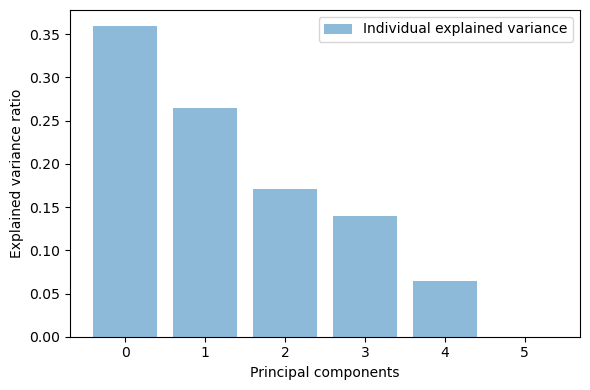

Shape of X_scaled: (869, 6)
Number of components: 6


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=6).fit(X_scaled)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(6, 4))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
print("Shape of X_scaled:", X_scaled.shape)
print("Number of components:", pca.n_components_)

PCA has only identified that first 5 principal components captured all the variance and the 6th component doesn't capture any. So choosing model with 6 dimensions doesn't really make sense. 

### Lasso Losgistic Regression

In [24]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use LogisticRegressionCV model to find the best C 
logistic_cv = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=10000, random_state=42)
logistic_cv.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred = logistic_cv.predict(X_test_scaled)
y_pred_proba = logistic_cv.predict_proba(X_test_scaled)[:, 1]

X_train_with_intercept = sm.add_constant(X_train_scaled) 
full_model = sm.GLM(y_train, X_train_with_intercept, family=sm.families.Binomial()).fit()
# pseudo R-squared for the training data
r_squared = 1 - (full_model.deviance / full_model.null_deviance)

# Evaluation metrics for testing data
mse = mean_squared_error(y_test, y_pred_proba)
rmse = sqrt(mse)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print(f'R Squared: {r_squared:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'LASSO Logistic Regression Test Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

R Squared: 0.3174
MSE: 0.1553
RMSE: 0.3941
LASSO Logistic Regression Test Accuracy: 0.7758620689655172
Confusion Matrix:
[[79 14]
 [25 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        93
           1       0.80      0.69      0.74        81

    accuracy                           0.78       174
   macro avg       0.78      0.77      0.77       174
weighted avg       0.78      0.78      0.77       174



### Interpretation: 

The accuracy for LASSO Logistic Regression is approximately 77.58%, which is in similar with that of 6 dimensions in PCA (77.59%), indicating a similar predictive performance between the LASSO model and the PCA with 6 dimensions.
The F1-scores for class '1' and '0' in LASSO are 0.74 and 0.80, which are also very close to the F1-scores obtained with PCA with 6 dimensions.
Same as precision ,recall and r-squared.

Lasso logistic regression performs feature selection using certain level of penalty which helps for getting a simpler, more interpretable model.
PCA can reduce the computational complexity and may help mitigate overfitting. On the other hand, PCA does not perform feature selection in the same way LASSO does, it creates a set of uncorrelated components. In general, Lasso model built above shows similar performace to the PCA model with 6 dimensions, with the advantage of providing a simpler model by eliminating some features. 

# 3. Decision Tree Analysis (25)
Tip: You can use Decision tree classifier from sklearn tree module for more information check this linkLinks to an external site.

from sklearn import tree
model = tree.DecisionTreeClassifier()

1. Split the dataset into training and testing sets and encode the variables if needed.
2. Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.)
3. Explain the steps clearly that you took in preparing the data and developing the model, feel free to remove unnecessary columns.
4. Train the decision tree classifier using the training data.
5. Predict the accuracy of model using test data and explain the results.

In [25]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

model.fit(X_train_scaled, y_train)
    
# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification report:")
print(report)

Accuracy: 0.7184
Confusion Matrix:
[[74 19]
 [30 51]]
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        93
           1       0.73      0.63      0.68        81

    accuracy                           0.72       174
   macro avg       0.72      0.71      0.71       174
weighted avg       0.72      0.72      0.72       174



Data prepartion, including handling missing values, encoding categorical variabes ('Sex' column), removing unnecessary columns (Name, Order, Ticket Number) have been done above. 

The accuracy suggests that the model is reasonably good at predicting between the classes. The recall for class 1 lower than that of class 0, indicating that  the model's lower ability to identify all actual positives. This could mean that the event is more conservative in approving entry. The confusion matrix with relatively high false negative also shows that the model predicts the entry was granted when it was not. 

# 4. K Means Clustering(30)
1. Use the Entry_event database and use the Age and Price columns only (drop all other columns)
2. Perform K means clustering for different values of K.
3. Draw a plot and figure out the appropriate value of K, explain in detail the reason for picking K value and the implications.
4. Create the clusters using the above value of K.
5. Plot a graph to show the different clusters.

In [26]:
Event_df_kmeans = Event_df_final[['Age', 'Price']].copy()
Event_df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     869 non-null    float64
 1   Price   869 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 13.7 KB


In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Scale the data so that all features are 0-1 as k-means are sensitive to scale
ms = MinMaxScaler()
scaled_data = ms.fit_transform(Event_df_kmeans) #Transforming columns into scaled versions
scaled_df = pd.DataFrame(scaled_data, columns=Event_df_kmeans.columns) # Converting back into pandas for easy dealing and plotting

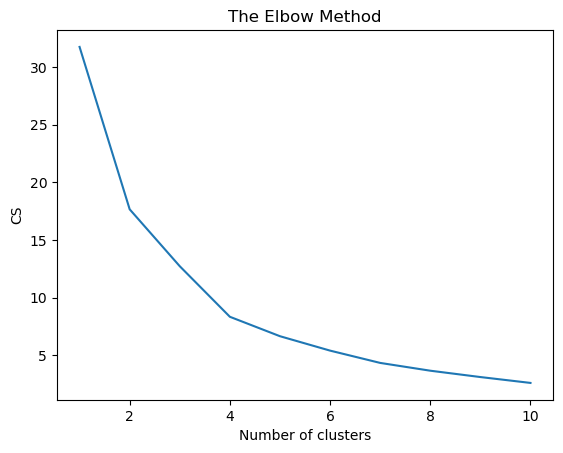

In [57]:
from sklearn.cluster import KMeans
# Find the best number of clusters
cs = []
kmeans_models = []
for i in range(1, 11):
    # k-means++ tends to find clusters that are more compact and better seperated, by spreading out the initial centers
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cs.append(kmeans.inertia_)
    kmeans_models.append(kmeans)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### Choosing 4 as the optimal numbers of clusters

To determine the optiomsl number of clustoers, I look for the "elbow" point in the plot, which is where the inertia starts to decrease at a slower rate as the number of clusters increases. This point represents a balance between the number of clusters and the sum of squared distances to the nearest cluster centroid.
The rate of decrease in inertia significantly slows down after this point, indicating that increasing the number of clusters beyond 4 doesn’t explain much more variances. Thus, I am choosing cluster of 4 based on the Elbow Method.

In [28]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_df)

# Cluster Labels
scaled_df['kmeans_cluster'] = kmeans.labels_

C:\Users\szhou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
scaled_df['kmeans_cluster'].value_counts()

kmeans_cluster
0    522
1    156
3    156
2     35
Name: count, dtype: int64

In [30]:
scaled_df.head()

,Age,Price,kmeans_cluster
0,0.271174,0.013672,0
1,0.472229,0.138672,0
2,0.321438,0.015625,0
3,0.434531,0.103516,0
4,0.434531,0.015625,0


C:\Users\szhou\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


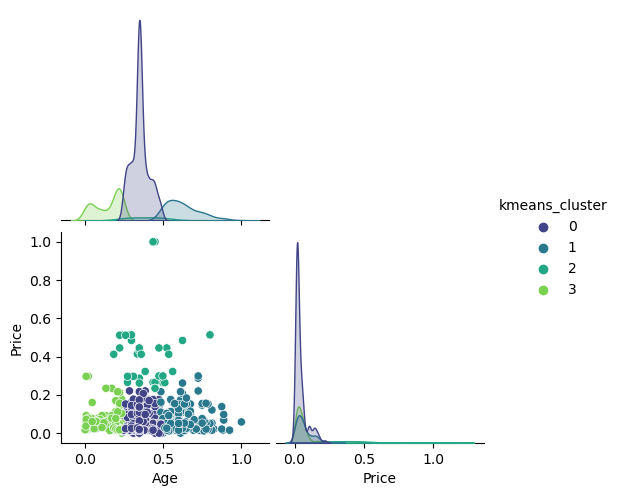

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

scaled_df['kmeans_cluster'] = scaled_df['kmeans_cluster'].astype('category')

sns.pairplot(scaled_df, hue='kmeans_cluster', palette='viridis', corner=True)  # `corner=True` to plot only the lower triangle
plt.show()

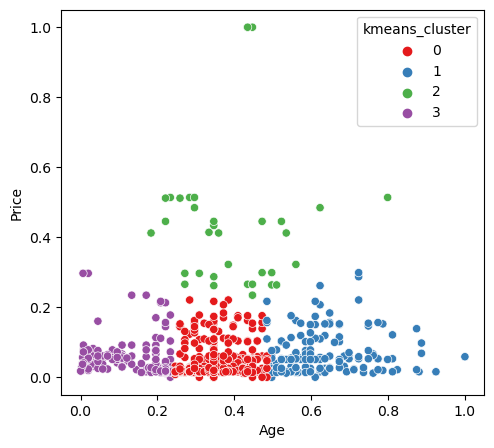

In [32]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Age', y='Price', data=scaled_df,
                hue='kmeans_cluster', palette='Set1', ax=axes[0], legend='full')
plt.delaxes(axes[1]) 

plt.show()

In [33]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_df.iloc[:,:4], kmeans.labels_)

0.8990255732991568

The silhouette score is 0.899, suggesting that on average, samples are pretty distant from the neighboring clusters, which means that the clusters are well distant from each other and clearly defined. Within the clusters the observations are similar but different outside the clusters. This is a good sign of the clustering structure. 